In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

import utils

In [2]:
def exp_decay(initial_lr, s):
    def exp_decay_fn(epoch):
        return initial_lr * 0.1**(epoch / s)
    return exp_decay_fn

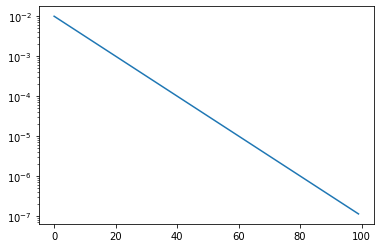

In [3]:
exp_decay_fn = exp_decay(initial_lr=0.01, s=20)

epochs = np.arange(100)
lr = exp_decay_fn(epochs)
plt.figure()
plt.plot(epochs, lr)
plt.yscale('log')
plt.show()

In [4]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

train_images  = train_images / 255.0
train_images = np.expand_dims(train_images, axis=-1)
print(f"train_images.shape = {train_images.shape}, train_labels.shape = {train_labels.shape}")

test_images = test_images / 255.0
test_images = np.expand_dims(test_images, axis=-1)
print(f"test_images.shape = {test_images.shape}, test_labels.shape = {test_labels.shape}")

train_images.shape = (60000, 28, 28, 1), train_labels.shape = (60000,)
test_images.shape = (10000, 28, 28, 1), test_labels.shape = (10000,)


In [5]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(10, activation='softmax')
])

optimizer = keras.optimizers.Adam()
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
exp_decay_fn = exp_decay(initial_lr=0.01, s=10)
lr_scheduler = keras.callbacks.LearningRateScheduler(exp_decay_fn, verbose=1)

In [7]:
# lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

In [8]:
utils.reset_session()

history = model.fit(
    train_images, train_labels, 
    epochs=10, 
    batch_size=64,
    validation_data=(train_images, train_labels),
    callbacks=[lr_scheduler]
)


Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.
Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.4342 - accuracy: 0.8407 - val_loss: 0.3471 - val_accuracy: 0.8699

Epoch 00002: LearningRateScheduler reducing learning rate to 0.007943282347242816.
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.3102 - accuracy: 0.8841 - val_loss: 0.2832 - val_accuracy: 0.8890

Epoch 00003: LearningRateScheduler reducing learning rate to 0.006309573444801933.
Epoch 3/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2688 - accuracy: 0.8981 - val_loss: 0.2486 - val_accuracy: 0.9046

Epoch 00004: LearningRateScheduler reducing learning rate to 0.005011872336272724.
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2340 - accuracy: 0.9106 - val_loss: 0.2086 - val_accuracy: 0.9187

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0039810717055349725.
Epoch 5/10
938/938 [=======